In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import mean_squared_error
import kerastuner as kt
import pickle
import joblib
from scipy import stats
from numpy import load
from numpy import save
from tensorflow.keras import regularizers
import seaborn as sns

In [2]:
sns.set_style("white")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

### Set seed

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

### Load Data

In [4]:
train_data = pd.read_pickle("../data/mlp_transformed/train_unsc_mlp.pkl")
valid_data = pd.read_pickle("../data/mlp_transformed/valid_unsc_mlp.pkl")
test_data = pd.read_pickle("../data/mlp_transformed/test_unsc_mlp.pkl")
all_train_data = pd.read_pickle("../data/mlp_transformed/all_train_unsc_mlp.pkl")

In [5]:
train_x = load('../data/mlp_transformed/train_x_mlp.npy')
train_y = load('../data/mlp_transformed/train_y_mlp.npy')
valid_x = load('../data/mlp_transformed/valid_x_mlp.npy')
valid_y = load('../data/mlp_transformed/valid_y_mlp.npy')
test_x = load('../data/mlp_transformed/test_x_mlp.npy')
test_y = load('../data/mlp_transformed/test_y_mlp.npy')
all_train_x = load('../data/mlp_transformed/all_x_mlp.npy')
all_train_y = load('../data/mlp_transformed/all_y_mlp.npy')

In [6]:
with open ('../data/mlp_transformed/label_keys_mlp.pkl', 'rb') as fp:
    label_keys = pickle.load(fp)
with open ('../data/mlp_transformed/feature_keys_mlp.pkl', 'rb') as fp:
    feature_keys = pickle.load(fp)    

### Load Scaler

In [7]:
scaler_y = joblib.load("../data/mlp_transformed/scaler_y_mlp.save") 
scaler_y_train = joblib.load("../data/mlp_transformed/scaler_y_train_mlp.save") 

## Loop function

In [8]:
def test_10_times(model, epochs, batch_size):
    runs = 10
    test_score = list()
    train_score = list()
    for i in range(runs):

        np.random.seed(42 + i)
        tf.random.set_seed(42 + i)

        history = model.fit(all_train_x, all_train_y,
                        epochs=epochs,
                        batch_size=batch_size,
                       )

        y_pred_test = model.predict(test_x)
        y_test_unsc = scaler_y.inverse_transform(test_y)
        y_pred_test_unsc = scaler_y.inverse_transform(y_pred_test)

        y_pred_train = model.predict(train_x)
        y_train_unsc = scaler_y.inverse_transform(train_y)
        y_pred_train_unsc = scaler_y.inverse_transform(y_pred_train)
        
        mse_test = np.sqrt(mean_squared_error(y_pred_test_unsc, y_test_unsc))  
        test_score.append(mse_test)

        mse_train = np.sqrt(mean_squared_error(y_pred_train_unsc, y_train_unsc))  
        train_score.append(mse_train)

    return  train_score, test_score


### Different Models

#### Simple MLP

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

def build_model_simple_mlp():
    model = keras.models.Sequential([
        keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal', input_shape=train_x.shape[1:]),
        keras.layers.Dense(2)
    ])
    model.compile(loss='mse',
                
                  optimizer=keras.optimizers.Adam(lr=1e-3),
                 
                 )
    return model

### Training

In [10]:
simple_mlp = build_model_simple_mlp()

simple_mlp_history = simple_mlp.fit(train_x, train_y,
                    epochs=200,
                    batch_size=32,
                    validation_data=(valid_x, valid_y),
                   )

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
4/4 [==============================] - 0s 36ms/step - loss: 0.5302 - val_loss: 0.4547
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.4163 - val_loss: 0.3540
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3239 - val_loss: 0.2715
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2464 - val_loss: 0.2060
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1858 - val_loss: 0.1558
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1409 - val_loss: 0.1185
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1098 - val_loss: 0.0924
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0865 - val_loss: 0.0750
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0714 - val_loss: 0.0639
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0612 - val_loss: 0.0568
Epoch 11/200
4/4 [==========

4/4 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 85/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 86/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 87/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 88/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 89/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 90/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 91/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 92/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 93/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 9.5285e-04 - val_loss: 9.4158e-04
Epoch 167/200
4/4 [==============================] - 0s 6ms/step - loss: 9.4041e-04 - val_loss: 9.3549e-04
Epoch 168/200
4/4 [==============================] - 0s 6ms/step - loss: 9.3529e-04 - val_loss: 9.2972e-04
Epoch 169/200
4/4 [==============================] - 0s 5ms/step - loss: 9.3268e-04 - val_loss: 9.2303e-04
Epoch 170/200
4/4 [==============================] - 0s 6ms/step - loss: 9.2607e-04 - val_loss: 9.1759e-04
Epoch 171/200
4/4 [==============================] - 0s 6ms/step - loss: 9.2330e-04 - val_loss: 9.1450e-04
Epoch 172/200
4/4 [==============================] - 0s 6ms/step - loss: 9.1515e-04 - val_loss: 9.0658e-04
Epoch 173/200
4/4 [==============================] - 0s 6ms/step - loss: 9.0722e-04 - val_loss: 9.0580e-04
Epoch 174/200
4/4 [==============================] - 0s 6ms/step - loss: 9.0800e-04 - val_loss: 8.9676e-04
Epoch 175/200
4/4 [==============================] 

#### Performance

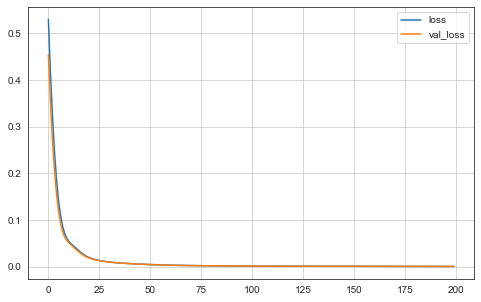

In [11]:
pd.DataFrame(simple_mlp_history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 0.01)
plt.show()

In [12]:
hist_simple_mlp = pd.DataFrame(simple_mlp_history.history) 
#hist_simple_mlp.to_pickle("../data/mlp_transformed/hist_simple_mlp.pkl")

In [13]:
## Calculate RMSE on training set
y_pred_train = simple_mlp.predict(train_x)
y_train_unsc = scaler_y_train.inverse_transform(train_y)
y_pred_train_unsc = scaler_y_train.inverse_transform(y_pred_train)
np.sqrt(mean_squared_error(y_train_unsc, y_pred_train_unsc))                       

1.7974374662603083

In [14]:
# calculate RMSE on validation set
y_pred_val = simple_mlp.predict(valid_x)
y_val_unsc = scaler_y_train.inverse_transform(valid_y)
y_pred_val_unsc = scaler_y_train.inverse_transform(y_pred_val)
np.sqrt(mean_squared_error(y_val_unsc, y_pred_val_unsc))                       

1.7974378060555345

### Testing

In [15]:
simple_mlp = build_model_simple_mlp()

simple_mlp_history = simple_mlp.fit(all_train_x, all_train_y,
                    epochs=160,
                    batch_size=32,
                   )

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/160
5/5 [==============================] - 0s 991us/step - loss: 0.2315
Epoch 2/160
5/5 [==============================] - 0s 748us/step - loss: 0.1635
Epoch 3/160
5/5 [==============================] - 0s 997us/step - loss: 0.1280
Epoch 4/160
5/5 [==============================] - 0s 748us/step - loss: 0.1085
Epoch 5/160
5/5 [==============================] - 0s 748us/step - loss: 0.0926
Epoch 6/160
5/5 [==============================] - 0s 987us/step - loss: 0.0759
Epoch 7/160
5/5 [==============================] - 0s 997us/step - loss: 0.0640
Epoch 8/160
5/5 [==============================] - 0s 989us/step - loss: 0.0550
Epoch 9/160
5/5 [==============================] - 0s 989us/step - loss: 0.0484
Epoch 10/160
5/5 [==============================] - 0s 748us/step - loss: 0.0434
Epoch 11/160
5/5 [==============================] - 0s 740us/step - loss: 0.0392
Epoch 12/160
5/5 [==============================] - 0s 988us/step - loss: 0.0361
Epoch 13/160
5/5 [===================

5/5 [==============================] - 0s 964us/step - loss: 0.0037
Epoch 103/160
5/5 [==============================] - 0s 748us/step - loss: 0.0036
Epoch 104/160
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 105/160
5/5 [==============================] - 0s 755us/step - loss: 0.0036
Epoch 106/160
5/5 [==============================] - 0s 748us/step - loss: 0.0036
Epoch 107/160
5/5 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 108/160
5/5 [==============================] - 0s 748us/step - loss: 0.0035
Epoch 109/160
5/5 [==============================] - 0s 997us/step - loss: 0.0034
Epoch 110/160
5/5 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 111/160
5/5 [==============================] - 0s 748us/step - loss: 0.0034
Epoch 112/160
5/5 [==============================] - 0s 749us/step - loss: 0.0033
Epoch 113/160
5/5 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 114/160
5/5 [=================

In [16]:
## Calculate RMSE on all training data
y_pred_all_train = simple_mlp.predict(all_train_x)
y_all_train_unsc = scaler_y.inverse_transform(all_train_y)
y_pred_all_train_unsc = scaler_y.inverse_transform(y_pred_all_train)
np.sqrt(mean_squared_error(y_all_train_unsc, y_pred_all_train_unsc))         

3.1176994191601617

In [17]:
## Caculate RMSE on test set
y_pred_test = simple_mlp.predict(test_x)
y_test_unsc = scaler_y.inverse_transform(test_y)
y_pred_test_unsc = scaler_y.inverse_transform(y_pred_test)
np.sqrt(mean_squared_error(y_test_unsc, y_pred_test_unsc))         

3.1176993074365633

### Test 10 times

In [18]:
LSTMSimple_model = build_model_simple_mlp()
epochs = 160
batch_size = 32
train_score, test_score = test_10_times(simple_mlp, epochs, batch_size)

Epoch 1/160
5/5 [==============================] - 0s 997us/step - loss: 0.0022
Epoch 2/160
5/5 [==============================] - 0s 748us/step - loss: 0.0022
Epoch 3/160
5/5 [==============================] - 0s 989us/step - loss: 0.0021
Epoch 4/160
5/5 [==============================] - 0s 997us/step - loss: 0.0022
Epoch 5/160
5/5 [==============================] - 0s 748us/step - loss: 0.0021
Epoch 6/160
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 7/160
5/5 [==============================] - 0s 748us/step - loss: 0.0021
Epoch 8/160
5/5 [==============================] - 0s 747us/step - loss: 0.0020
Epoch 9/160
5/5 [==============================] - 0s 997us/step - loss: 0.0020
Epoch 10/160
5/5 [==============================] - 0s 989us/step - loss: 0.0020
Epoch 11/160
5/5 [==============================] - 0s 748us/step - loss: 0.0020
Epoch 12/160
5/5 [==============================] - 0s 997us/step - loss: 0.0020
Epoch 13/160
5/5 [=====================

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 23/160
5/5 [==============================] - 0s 749us/step - loss: 0.0018
Epoch 24/160
5/5 [==============================] - 0s 997us/step - loss: 0.0018
Epoch 25/160
5/5 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 26/160
5/5 [==============================] - 0s 748us/step - loss: 0.0018
Epoch 27/160
5/5 [==============================] - 0s 748us/step - loss: 0.0017
Epoch 28/160
5/5 [==============================] - 0s 997us/step - loss: 0.0017
Epoch 29/160
5/5 [==============================] - 0s 748us/step - loss: 0.0017
Epoch 30/160
5/5 [==============================] - 0s 748us/step - loss: 0.0017
Epoch 31/160
5/5 [==============================] - 0s 998us/step - loss: 0.0017
Epoch 32/160
5/5 [==============================] - 0s 748us/step - loss: 0.0016
Epoch 33/160
5/5 [==============================] - 0s 755us/step - loss: 0.0016
Epoch 34/160
5/5 [==============================] - 0s 748us/step - loss: 0.0016
Epoch 35/160
5/5 [============

5/5 [==============================] - 0s 742us/step - loss: 4.8546e-04
Epoch 122/160
5/5 [==============================] - 0s 749us/step - loss: 4.8696e-04
Epoch 123/160
5/5 [==============================] - 0s 739us/step - loss: 4.7351e-04
Epoch 124/160
5/5 [==============================] - 0s 748us/step - loss: 4.7056e-04
Epoch 125/160
5/5 [==============================] - 0s 748us/step - loss: 4.6233e-04
Epoch 126/160
5/5 [==============================] - 0s 748us/step - loss: 4.5896e-04
Epoch 127/160
5/5 [==============================] - 0s 756us/step - loss: 4.4685e-04
Epoch 128/160
5/5 [==============================] - 0s 748us/step - loss: 4.5238e-04
Epoch 129/160
5/5 [==============================] - 0s 748us/step - loss: 4.4128e-04
Epoch 130/160
5/5 [==============================] - 0s 748us/step - loss: 4.3293e-04
Epoch 131/160
5/5 [==============================] - 0s 748us/step - loss: 4.3294e-04
Epoch 132/160
5/5 [==============================] - 0s 739us/step -

5/5 [==============================] - 0s 997us/step - loss: 1.7912e-04
Epoch 58/160
5/5 [==============================] - 0s 748us/step - loss: 1.7928e-04
Epoch 59/160
5/5 [==============================] - 0s 997us/step - loss: 1.8030e-04
Epoch 60/160
5/5 [==============================] - 0s 998us/step - loss: 1.7147e-04
Epoch 61/160
5/5 [==============================] - 0s 998us/step - loss: 1.7898e-04
Epoch 62/160
5/5 [==============================] - 0s 998us/step - loss: 1.7643e-04
Epoch 63/160
5/5 [==============================] - 0s 997us/step - loss: 1.7661e-04
Epoch 64/160
5/5 [==============================] - 0s 998us/step - loss: 1.7572e-04
Epoch 65/160
5/5 [==============================] - 0s 997us/step - loss: 1.7353e-04
Epoch 66/160
5/5 [==============================] - 0s 1ms/step - loss: 1.7577e-04
Epoch 67/160
5/5 [==============================] - 0s 997us/step - loss: 1.7281e-04
Epoch 68/160
5/5 [==============================] - 0s 914us/step - loss: 1.6870

5/5 [==============================] - 0s 748us/step - loss: 9.2229e-05
Epoch 154/160
5/5 [==============================] - 0s 990us/step - loss: 9.1659e-05
Epoch 155/160
5/5 [==============================] - 0s 740us/step - loss: 9.1080e-05
Epoch 156/160
5/5 [==============================] - 0s 749us/step - loss: 9.1604e-05
Epoch 157/160
5/5 [==============================] - 0s 748us/step - loss: 9.1074e-05
Epoch 158/160
5/5 [==============================] - 0s 997us/step - loss: 8.8795e-05
Epoch 159/160
5/5 [==============================] - 0s 749us/step - loss: 8.9695e-05
Epoch 160/160
5/5 [==============================] - 0s 748us/step - loss: 9.0454e-05
Epoch 1/160
5/5 [==============================] - 0s 991us/step - loss: 8.7969e-05
Epoch 2/160
5/5 [==============================] - 0s 748us/step - loss: 8.7107e-05
Epoch 3/160
5/5 [==============================] - 0s 1ms/step - loss: 8.7343e-05
Epoch 4/160
5/5 [==============================] - 0s 1ms/step - loss: 8.557

5/5 [==============================] - 0s 997us/step - loss: 5.3073e-05
Epoch 90/160
5/5 [==============================] - 0s 753us/step - loss: 5.1149e-05
Epoch 91/160
5/5 [==============================] - 0s 748us/step - loss: 4.9922e-05
Epoch 92/160
5/5 [==============================] - 0s 752us/step - loss: 4.9827e-05
Epoch 93/160
5/5 [==============================] - 0s 748us/step - loss: 4.9729e-05
Epoch 94/160
5/5 [==============================] - 0s 748us/step - loss: 5.1810e-05
Epoch 95/160
5/5 [==============================] - 0s 835us/step - loss: 5.0100e-05
Epoch 96/160
5/5 [==============================] - 0s 748us/step - loss: 4.8568e-05
Epoch 97/160
5/5 [==============================] - 0s 997us/step - loss: 4.8436e-05
Epoch 98/160
5/5 [==============================] - 0s 748us/step - loss: 4.8127e-05
Epoch 99/160
5/5 [==============================] - 0s 749us/step - loss: 4.8840e-05
Epoch 100/160
5/5 [==============================] - 0s 748us/step - loss: 4.7

Epoch 25/160
5/5 [==============================] - 0s 756us/step - loss: 2.9867e-05
Epoch 26/160
5/5 [==============================] - 0s 748us/step - loss: 2.9437e-05
Epoch 27/160
5/5 [==============================] - 0s 748us/step - loss: 2.8193e-05
Epoch 28/160
5/5 [==============================] - 0s 748us/step - loss: 2.7438e-05
Epoch 29/160
5/5 [==============================] - 0s 748us/step - loss: 2.8600e-05
Epoch 30/160
5/5 [==============================] - 0s 816us/step - loss: 2.7826e-05
Epoch 31/160
5/5 [==============================] - 0s 748us/step - loss: 2.7527e-05
Epoch 32/160
5/5 [==============================] - 0s 761us/step - loss: 2.5968e-05
Epoch 33/160
5/5 [==============================] - 0s 748us/step - loss: 2.8020e-05
Epoch 34/160
5/5 [==============================] - 0s 989us/step - loss: 2.7809e-05
Epoch 35/160
5/5 [==============================] - 0s 748us/step - loss: 2.7147e-05
Epoch 36/160
5/5 [==============================] - 0s 756us/step

5/5 [==============================] - 0s 1ms/step - loss: 1.5721e-05
Epoch 122/160
5/5 [==============================] - 0s 755us/step - loss: 1.5957e-05
Epoch 123/160
5/5 [==============================] - 0s 748us/step - loss: 1.5273e-05
Epoch 124/160
5/5 [==============================] - 0s 997us/step - loss: 1.4177e-05
Epoch 125/160
5/5 [==============================] - 0s 997us/step - loss: 1.2975e-05
Epoch 126/160
5/5 [==============================] - 0s 999us/step - loss: 1.3147e-05
Epoch 127/160
5/5 [==============================] - 0s 1ms/step - loss: 1.2606e-05
Epoch 128/160
5/5 [==============================] - 0s 748us/step - loss: 1.2127e-05
Epoch 129/160
5/5 [==============================] - 0s 990us/step - loss: 1.2303e-05
Epoch 130/160
5/5 [==============================] - 0s 998us/step - loss: 1.1907e-05
Epoch 131/160
5/5 [==============================] - 0s 740us/step - loss: 1.2332e-05
Epoch 132/160
5/5 [==============================] - 0s 742us/step - los

5/5 [==============================] - 0s 748us/step - loss: 4.4040e-06
Epoch 58/160
5/5 [==============================] - 0s 997us/step - loss: 4.1704e-06
Epoch 59/160
5/5 [==============================] - 0s 998us/step - loss: 3.9956e-06
Epoch 60/160
5/5 [==============================] - 0s 997us/step - loss: 4.3579e-06
Epoch 61/160
5/5 [==============================] - 0s 999us/step - loss: 4.1698e-06
Epoch 62/160
5/5 [==============================] - 0s 748us/step - loss: 4.1315e-06
Epoch 63/160
5/5 [==============================] - 0s 755us/step - loss: 4.1489e-06
Epoch 64/160
5/5 [==============================] - 0s 1ms/step - loss: 4.3866e-06
Epoch 65/160
5/5 [==============================] - 0s 748us/step - loss: 5.1040e-06
Epoch 66/160
5/5 [==============================] - 0s 749us/step - loss: 4.4308e-06
Epoch 67/160
5/5 [==============================] - 0s 991us/step - loss: 4.2190e-06
Epoch 68/160
5/5 [==============================] - 0s 997us/step - loss: 5.0573

5/5 [==============================] - 0s 998us/step - loss: 9.1449e-07
Epoch 153/160
5/5 [==============================] - 0s 998us/step - loss: 8.0793e-07
Epoch 154/160
5/5 [==============================] - 0s 997us/step - loss: 7.5679e-07
Epoch 155/160
5/5 [==============================] - 0s 748us/step - loss: 6.5637e-07
Epoch 156/160
5/5 [==============================] - 0s 997us/step - loss: 6.3865e-07
Epoch 157/160
5/5 [==============================] - 0s 755us/step - loss: 6.7456e-07
Epoch 158/160
5/5 [==============================] - 0s 746us/step - loss: 5.7725e-07
Epoch 159/160
5/5 [==============================] - 0s 748us/step - loss: 6.2227e-07
Epoch 160/160
5/5 [==============================] - 0s 997us/step - loss: 6.1396e-07
Epoch 1/160
5/5 [==============================] - 0s 748us/step - loss: 5.7661e-07
Epoch 2/160
5/5 [==============================] - 0s 1ms/step - loss: 5.4212e-07
Epoch 3/160
5/5 [==============================] - 0s 1ms/step - loss: 5.6

Epoch 89/160
5/5 [==============================] - 0s 998us/step - loss: 2.2013e-07
Epoch 90/160
5/5 [==============================] - 0s 997us/step - loss: 1.8107e-07
Epoch 91/160
5/5 [==============================] - 0s 988us/step - loss: 1.5360e-07
Epoch 92/160
5/5 [==============================] - 0s 1ms/step - loss: 1.1838e-07
Epoch 93/160
5/5 [==============================] - 0s 749us/step - loss: 1.2309e-07
Epoch 94/160
5/5 [==============================] - 0s 997us/step - loss: 1.3747e-07
Epoch 95/160
5/5 [==============================] - 0s 1ms/step - loss: 1.4225e-07
Epoch 96/160
5/5 [==============================] - 0s 997us/step - loss: 1.6113e-07
Epoch 97/160
5/5 [==============================] - 0s 1ms/step - loss: 1.3508e-07
Epoch 98/160
5/5 [==============================] - 0s 1ms/step - loss: 1.2001e-07
Epoch 99/160
5/5 [==============================] - 0s 2ms/step - loss: 9.9050e-08
Epoch 100/160
5/5 [==============================] - 0s 997us/step - loss: 

5/5 [==============================] - 0s 2ms/step - loss: 1.0412e-08
Epoch 25/160
5/5 [==============================] - 0s 998us/step - loss: 1.2756e-08
Epoch 26/160
5/5 [==============================] - 0s 2ms/step - loss: 9.4399e-09
Epoch 27/160
5/5 [==============================] - 0s 1ms/step - loss: 1.1457e-08
Epoch 28/160
5/5 [==============================] - 0s 1ms/step - loss: 1.3427e-08
Epoch 29/160
5/5 [==============================] - 0s 1ms/step - loss: 1.0725e-08
Epoch 30/160
5/5 [==============================] - 0s 1ms/step - loss: 1.1099e-08
Epoch 31/160
5/5 [==============================] - 0s 2ms/step - loss: 8.6635e-09
Epoch 32/160
5/5 [==============================] - 0s 1ms/step - loss: 6.1448e-09
Epoch 33/160
5/5 [==============================] - 0s 2ms/step - loss: 6.6113e-09
Epoch 34/160
5/5 [==============================] - 0s 1ms/step - loss: 5.8609e-09
Epoch 35/160
5/5 [==============================] - 0s 1ms/step - loss: 5.3672e-09
Epoch 36/160
5/

5/5 [==============================] - 0s 1ms/step - loss: 6.3563e-10
Epoch 122/160
5/5 [==============================] - 0s 1ms/step - loss: 4.9521e-10
Epoch 123/160
5/5 [==============================] - 0s 2ms/step - loss: 4.5433e-10
Epoch 124/160
5/5 [==============================] - 0s 2ms/step - loss: 4.7907e-10
Epoch 125/160
5/5 [==============================] - 0s 997us/step - loss: 7.6414e-10
Epoch 126/160
5/5 [==============================] - 0s 1ms/step - loss: 5.0315e-10
Epoch 127/160
5/5 [==============================] - 0s 997us/step - loss: 3.7888e-10
Epoch 128/160
5/5 [==============================] - 0s 1ms/step - loss: 3.2332e-10
Epoch 129/160
5/5 [==============================] - 0s 748us/step - loss: 3.8096e-10
Epoch 130/160
5/5 [==============================] - 0s 997us/step - loss: 4.0667e-10
Epoch 131/160
5/5 [==============================] - 0s 996us/step - loss: 5.2027e-10
Epoch 132/160
5/5 [==============================] - 0s 998us/step - loss: 6.588

5/5 [==============================] - 0s 998us/step - loss: 4.8939e-08
Epoch 58/160
5/5 [==============================] - 0s 996us/step - loss: 6.2762e-08
Epoch 59/160
5/5 [==============================] - 0s 997us/step - loss: 1.7155e-07
Epoch 60/160
5/5 [==============================] - 0s 997us/step - loss: 2.2165e-07
Epoch 61/160
5/5 [==============================] - 0s 997us/step - loss: 8.3733e-08
Epoch 62/160
5/5 [==============================] - 0s 997us/step - loss: 2.7780e-07
Epoch 63/160
5/5 [==============================] - 0s 997us/step - loss: 3.5316e-07
Epoch 64/160
5/5 [==============================] - 0s 748us/step - loss: 3.2933e-07
Epoch 65/160
5/5 [==============================] - 0s 748us/step - loss: 3.2653e-07
Epoch 66/160
5/5 [==============================] - 0s 746us/step - loss: 1.3845e-07
Epoch 67/160
5/5 [==============================] - 0s 748us/step - loss: 1.3038e-07
Epoch 68/160
5/5 [==============================] - 0s 997us/step - loss: 7.11

5/5 [==============================] - 0s 997us/step - loss: 5.3893e-08
Epoch 154/160
5/5 [==============================] - 0s 1ms/step - loss: 4.4723e-08
Epoch 155/160
5/5 [==============================] - 0s 989us/step - loss: 7.0759e-08
Epoch 156/160
5/5 [==============================] - 0s 997us/step - loss: 6.3832e-08
Epoch 157/160
5/5 [==============================] - 0s 748us/step - loss: 8.5211e-08
Epoch 158/160
5/5 [==============================] - 0s 998us/step - loss: 5.6545e-08
Epoch 159/160
5/5 [==============================] - 0s 1ms/step - loss: 2.5998e-08
Epoch 160/160
5/5 [==============================] - 0s 748us/step - loss: 3.1790e-08
Epoch 1/160
5/5 [==============================] - 0s 973us/step - loss: 2.4552e-08
Epoch 2/160
5/5 [==============================] - 0s 997us/step - loss: 3.1875e-08
Epoch 3/160
5/5 [==============================] - 0s 998us/step - loss: 4.4072e-08
Epoch 4/160
5/5 [==============================] - 0s 740us/step - loss: 5.689

5/5 [==============================] - 0s 998us/step - loss: 8.0769e-09
Epoch 91/160
5/5 [==============================] - 0s 997us/step - loss: 5.5341e-09
Epoch 92/160
5/5 [==============================] - 0s 997us/step - loss: 1.9210e-09
Epoch 93/160
5/5 [==============================] - 0s 997us/step - loss: 2.6379e-09
Epoch 94/160
5/5 [==============================] - 0s 998us/step - loss: 7.0277e-09
Epoch 95/160
5/5 [==============================] - 0s 748us/step - loss: 3.7319e-08
Epoch 96/160
5/5 [==============================] - 0s 997us/step - loss: 2.2928e-08
Epoch 97/160
5/5 [==============================] - 0s 748us/step - loss: 1.4979e-08
Epoch 98/160
5/5 [==============================] - 0s 1ms/step - loss: 1.5774e-08
Epoch 99/160
5/5 [==============================] - 0s 997us/step - loss: 2.8465e-08
Epoch 100/160
5/5 [==============================] - 0s 748us/step - loss: 2.8248e-08
Epoch 101/160
5/5 [==============================] - 0s 997us/step - loss: 7.78

Epoch 26/160
5/5 [==============================] - 0s 986us/step - loss: 1.4481e-09
Epoch 27/160
5/5 [==============================] - 0s 736us/step - loss: 1.5035e-09
Epoch 28/160
5/5 [==============================] - 0s 748us/step - loss: 6.8386e-10
Epoch 29/160
5/5 [==============================] - 0s 748us/step - loss: 9.0394e-10
Epoch 30/160
5/5 [==============================] - 0s 490us/step - loss: 1.3198e-09
Epoch 31/160
5/5 [==============================] - 0s 748us/step - loss: 1.9518e-09
Epoch 32/160
5/5 [==============================] - 0s 1ms/step - loss: 1.5223e-09
Epoch 33/160
5/5 [==============================] - 0s 749us/step - loss: 2.9162e-09
Epoch 34/160
5/5 [==============================] - 0s 988us/step - loss: 3.2808e-09
Epoch 35/160
5/5 [==============================] - 0s 989us/step - loss: 4.8956e-09
Epoch 36/160
5/5 [==============================] - 0s 739us/step - loss: 4.0314e-09
Epoch 37/160
5/5 [==============================] - 0s 756us/step -

5/5 [==============================] - 0s 748us/step - loss: 3.7302e-06
Epoch 124/160
5/5 [==============================] - 0s 962us/step - loss: 3.9808e-06
Epoch 125/160
5/5 [==============================] - 0s 998us/step - loss: 2.2167e-06
Epoch 126/160
5/5 [==============================] - 0s 996us/step - loss: 2.4090e-06
Epoch 127/160
5/5 [==============================] - 0s 748us/step - loss: 1.6913e-06
Epoch 128/160
5/5 [==============================] - 0s 998us/step - loss: 1.6119e-06
Epoch 129/160
5/5 [==============================] - 0s 998us/step - loss: 8.6096e-07
Epoch 130/160
5/5 [==============================] - 0s 1ms/step - loss: 6.5282e-07
Epoch 131/160
5/5 [==============================] - 0s 997us/step - loss: 4.0390e-07
Epoch 132/160
5/5 [==============================] - 0s 750us/step - loss: 2.5074e-07
Epoch 133/160
5/5 [==============================] - 0s 1ms/step - loss: 2.7796e-07
Epoch 134/160
5/5 [==============================] - 0s 989us/step - los

In [19]:
pd.DataFrame(train_score).describe()

,0
count,10.000000
mean,0.244097
std,0.382242
min,0.001057
25%,0.010690
50%,0.033297
75%,0.338464
max,1.164025


In [20]:
pd.DataFrame(test_score).describe()

,0
count,10.000000
mean,0.244097
std,0.382242
min,0.001057
25%,0.010690
50%,0.033297
75%,0.338464
max,1.164025


## Simple Model with Dropout

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

def build_model_simple_dropout():
    model_reg = keras.models.Sequential([
        keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal', input_shape=train_x.shape[1:]),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(2, kernel_initializer='he_normal')
    ])
    model_reg.compile(loss='mse',
                 
        optimizer=keras.optimizers.Adam(lr=1e-3),
                  
                 )
    return model_reg

### Training

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

model_simple_dropout = build_model_simple_dropout()

history_simple_dropout = model_simple_dropout.fit(train_x, train_y,
                    epochs=200,
                    batch_size=32,
                    validation_data=(valid_x, valid_y),
                    callbacks=[callback]
                   )


C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
4/4 [==============================] - 0s 38ms/step - loss: 0.4062 - val_loss: 0.2493
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2865 - val_loss: 0.1964
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2624 - val_loss: 0.1637
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2590 - val_loss: 0.1455
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2537 - val_loss: 0.1349
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2449 - val_loss: 0.1264
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2291 - val_loss: 0.1181
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2248 - val_loss: 0.1106
Epoch 9/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1982 - val_loss: 0.1039
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1876 - val_loss: 0.0977
Epoch 11/200
4/4 [==========

4/4 [==============================] - 0s 7ms/step - loss: 0.0279 - val_loss: 0.0052
Epoch 85/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0262 - val_loss: 0.0053
Epoch 86/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0311 - val_loss: 0.0053
Epoch 87/200
4/4 [==============================] - 0s 8ms/step - loss: 0.0322 - val_loss: 0.0050
Epoch 88/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0341 - val_loss: 0.0050
Epoch 89/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0324 - val_loss: 0.0048
Epoch 90/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0285 - val_loss: 0.0047
Epoch 91/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0298 - val_loss: 0.0046
Epoch 92/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0282 - val_loss: 0.0046
Epoch 93/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0348 - val_loss: 0.0048
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.0024
Epoch 168/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.0024
Epoch 169/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0027
Epoch 170/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.0032
Epoch 171/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0031
Epoch 172/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0159 - val_loss: 0.0031
Epoch 173/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.0031
Epoch 174/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0028
Epoch 175/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.0026
Epoch 176/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0180 - val_loss: 0.0026
Epoch 177/200
4/4 [=====

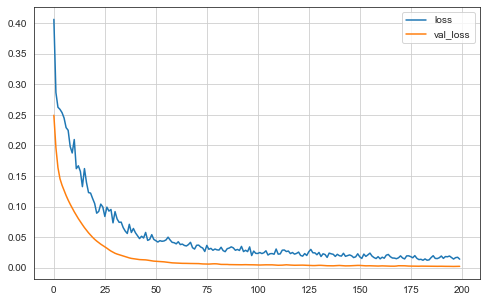

In [23]:
pd.DataFrame(history_simple_dropout.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [24]:
hist_simple_dropout = pd.DataFrame(history_simple_dropout.history) 
# hist_simple_dropout.to_pickle("../data/mlp_transformed/hist_simple_dropout.pkl")

In [25]:
y_pred_train = model_simple_dropout.predict(train_x)
y_train_unsc = scaler_y_train.inverse_transform(train_y)
y_pred_train_unsc = scaler_y_train.inverse_transform(y_pred_train)
np.sqrt(mean_squared_error(y_train_unsc, y_pred_train_unsc))                       

3.12244252469449

In [26]:
y_pred_val = model_simple_dropout.predict(valid_x)
y_val_unsc = scaler_y_train.inverse_transform(valid_y)
y_pred_val_unsc = scaler_y_train.inverse_transform(y_pred_val)
np.sqrt(mean_squared_error(y_val_unsc, y_pred_val_unsc))                       

3.122442543232715

## Simple Model with Weight Regularization

In [27]:
def build_model_simple_weight_reg():
    model_kernel = keras.models.Sequential([
        keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal', input_shape=train_x.shape[1:],
                          kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dense(2, kernel_initializer='he_normal')
    ])
    model_kernel.compile(loss='mse',
                  optimizer=keras.optimizers.Adam(lr=1e-3),
                 
                 )
    return model_kernel

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

model_simple_weight_reg = build_model_simple_weight_reg()

history_simple_weight_reg = model_simple_weight_reg.fit(train_x, train_y,
                    epochs=300,
                    batch_size=32,
                    validation_data=(valid_x, valid_y),
                    callbacks=[callback]
                   )

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/300
4/4 [==============================] - 0s 35ms/step - loss: 0.7944 - val_loss: 0.6983
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6511 - val_loss: 0.5667
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5271 - val_loss: 0.4552
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4227 - val_loss: 0.3652
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3398 - val_loss: 0.2969
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2787 - val_loss: 0.2477
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2353 - val_loss: 0.2153
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2078 - val_loss: 0.1952
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1898 - val_loss: 0.1835
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1808 - val_loss: 0.1758
Epoch 11/300
4/4 [==========

4/4 [==============================] - 0s 6ms/step - loss: 0.0430 - val_loss: 0.0428
Epoch 85/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0427 - val_loss: 0.0425
Epoch 86/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0424 - val_loss: 0.0422
Epoch 87/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.0419
Epoch 88/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0418 - val_loss: 0.0417
Epoch 89/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0416 - val_loss: 0.0414
Epoch 90/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0413 - val_loss: 0.0411
Epoch 91/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0410 - val_loss: 0.0409
Epoch 92/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0408 - val_loss: 0.0406
Epoch 93/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0405 - val_loss: 0.0403
Epoch 94/300
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.0273
Epoch 168/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0273 - val_loss: 0.0272
Epoch 169/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.0271
Epoch 170/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0271 - val_loss: 0.0270
Epoch 171/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0269 - val_loss: 0.0269
Epoch 172/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.0267
Epoch 173/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0267 - val_loss: 0.0266
Epoch 174/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.0265
Epoch 175/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0265 - val_loss: 0.0264
Epoch 176/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0264 - val_loss: 0.0263
Epoch 177/300
4/4 [=====

Epoch 250/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0199
Epoch 251/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0199
Epoch 252/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0198 - val_loss: 0.0198
Epoch 253/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0198 - val_loss: 0.0197
Epoch 254/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.0196
Epoch 255/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0196 - val_loss: 0.0196
Epoch 256/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0196 - val_loss: 0.0195
Epoch 257/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0195 - val_loss: 0.0194
Epoch 258/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0194 - val_loss: 0.0194
Epoch 259/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0193
Epoch 260/

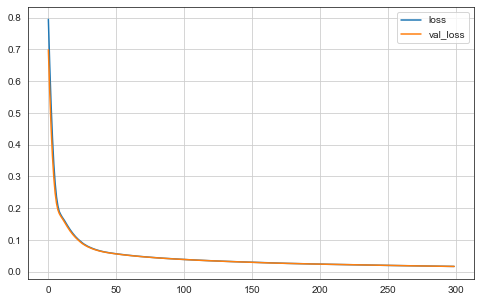

In [29]:
pd.DataFrame(history_simple_weight_reg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [30]:
hist_simple_weight_reg = pd.DataFrame(history_simple_weight_reg.history) 
# hist_simple_weight_reg.to_pickle("../data/mlp_transformed/hist_simple_weight_reg.pkl")

In [31]:
y_pred_train = model_simple_weight_reg.predict(train_x)
y_train_unsc = scaler_y_train.inverse_transform(train_y)
y_pred_train_unsc = scaler_y_train.inverse_transform(y_pred_train)
np.sqrt(mean_squared_error(y_train_unsc, y_pred_train_unsc))                       

1.6240260376915272

In [32]:
y_pred_val = model_simple_weight_reg.predict(valid_x)
y_val_unsc = scaler_y_train.inverse_transform(valid_y)
y_pred_val_unsc = scaler_y_train.inverse_transform(y_pred_val)
np.sqrt(mean_squared_error(y_val_unsc, y_pred_val_unsc))                       

1.624026194041888

### MLP Dropout Hyperband

### Keras Tuner implementation of Hyperband
Hyperparameter search may take a while even with limited data, resulting architectur when used with all data is provided next

In [33]:
# ## MLP with Dropout
# def model_builder_mlp (hp):
    
#     model = keras.models.Sequential()
   
#     hp_max_norm = hp.Choice("max_norm",values = [0, 1, 2])
#     hp_units = hp.Choice("unit",values = [16, 32, 64, 128, 192 ]) 
#     hp_dropout = hp.Choice("mlp_layer_dropout",values = [ 0.2, 0.3])
#     hp_number_of_layers = hp.Int("layers",min_value=0,max_value=3,step=1)
    
#     model.add(keras.layers.Dense(
#                             units= hp_units,
#                             kernel_constraint=keras.constraints.max_norm(max_value=hp_max_norm),                    
#                             activation='relu',
#                             input_shape=train_x.shape[1:]     
#                      ))
    
#     model.add(keras.layers.Dropout(hp_dropout))
    
#     for i in range(hp_number_of_layers):
#         model.add(keras.layers.Dense(
#                         units = hp_units,
#                         kernel_constraint=keras.constraints.max_norm(max_value=hp_max_norm),
#                         activation='relu',
#                         kernel_initializer='he_normal'
#                         ))
        
#         model.add(keras.layers.Dropout(hp_dropout))
    
#     model.add(keras.layers.Dense(2, kernel_initializer='he_normal'))
        
#     mlp_learning_rate = hp.Choice('learning_rate', values = [ 1e-3, 1e-4])
#     optimizer = keras.optimizers.Adam(lr=mlp_learning_rate)
    
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# class MyTuner(kt.tuners.Hyperband):
#   def run_trial(self, trial, *args, **kwargs):
#     kwargs['batch_size'] = trial.hyperparameters.Choice("batch_size",values = [32, 128, 512])
#     super(MyTuner, self).run_trial(trial, *args, **kwargs)
    
# tuner = MyTuner(model_builder_mlp,
#                 objective='val_loss',
#                 max_epochs = 100,
#                 factor = 3,
#                 seed = 42,
#                 directory = "k",
#                 project_name = 'k3')


In [34]:

# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# tuner.search(train_x,
#              train_y,
#              epochs = 150,
#              validation_data = (valid_x, valid_y),
#              callbacks = [stop_early]
#             )

### Training

#### Either: Keras Tuner implementation of Hyperband

In [35]:
# print(tuner.get_best_hyperparameters()[0].values)

In [36]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# mlp_dropout = tuner.hypermodel.build(best_hps)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# # Retrain the model
# history_mlp_dropout = mlp_dropout.fit(train_x, train_y,
#                     epochs=171,
#                     batch_size=32,
#                     validation_data=(valid_x, valid_y),
#                     callbacks=[early_stop]
#                    )

#### Or: Rebuild best Hyperband model manually

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

def build_model_dropout_tuned():
    model_reg = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal',
                           input_shape=train_x.shape[1:],
                           kernel_constraint=keras.constraints.max_norm(max_value=1),),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal',
                          kernel_constraint=keras.constraints.max_norm(max_value=1),),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(2, kernel_initializer='he_normal')
    ])
    model_reg.compile(loss='mse',
        optimizer=keras.optimizers.Adam(lr=1e-3),     
                 )
    return model_reg

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

mlp_dropout = build_model_dropout_tuned()

history_mlp_dropout = mlp_dropout.fit(train_x, train_y,
                    epochs=300,
                    batch_size=32,
                    validation_data=(valid_x, valid_y),
                    callbacks=[callback]
                   )

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/300
4/4 [==============================] - 1s 32ms/step - loss: 0.4882 - val_loss: 0.1167
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1697 - val_loss: 0.0756
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1757 - val_loss: 0.0717
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1620 - val_loss: 0.0321
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0828 - val_loss: 0.0389
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0849 - val_loss: 0.0431
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0708 - val_loss: 0.0325
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0702 - val_loss: 0.0178
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0749 - val_loss: 0.0117
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0681 - val_loss: 0.0107
Epoch 11/300
4/4 [==========

4/4 [==============================] - 0s 6ms/step - loss: 0.0140 - val_loss: 0.0056
Epoch 85/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.0068
Epoch 86/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0103
Epoch 87/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.0125
Epoch 88/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.0080
Epoch 89/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0174 - val_loss: 0.0056
Epoch 90/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.0070
Epoch 91/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.0120
Epoch 92/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0137 - val_loss: 0.0116
Epoch 93/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0161 - val_loss: 0.0086
Epoch 94/300
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.0127 - val_loss: 0.0098
Epoch 168/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0053
Epoch 169/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0095 - val_loss: 0.0067
Epoch 170/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.0077
Epoch 171/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0124 - val_loss: 0.0055
Epoch 172/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.0052
Epoch 173/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0093 - val_loss: 0.0107
Epoch 174/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.0081
Epoch 175/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0113 - val_loss: 0.0059
Epoch 176/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.0053
Epoch 177/300
4/4 [=====

Epoch 250/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 251/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 252/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0093 - val_loss: 0.0041
Epoch 253/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0044
Epoch 254/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.0033
Epoch 255/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 256/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0050
Epoch 257/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 258/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0069 - val_loss: 0.0043
Epoch 259/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 260/

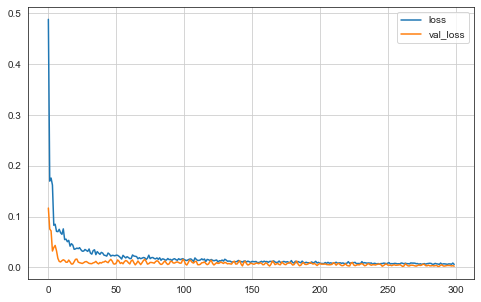

In [39]:
pd.DataFrame(history_mlp_dropout.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [40]:
hist_mlp_dropout= pd.DataFrame(history_mlp_dropout.history) 
# hist_mlp_dropout.to_pickle("../data/mlp_transformed/hist_mlp_dropout.pkl")

In [41]:
y_pred_train = mlp_dropout.predict(train_x)
y_train_unsc = scaler_y_train.inverse_transform(train_y)
y_pred_train_unsc = scaler_y_train.inverse_transform(y_pred_train)
np.sqrt(mean_squared_error(y_train_unsc, y_pred_train_unsc))                       

3.162877977232052

In [42]:
y_pred_val = mlp_dropout.predict(valid_x)
y_val_unsc = scaler_y_train.inverse_transform(valid_y)
y_pred_val_unsc = scaler_y_train.inverse_transform(y_pred_val)
np.sqrt(mean_squared_error(y_val_unsc, y_pred_val_unsc))                       

3.162877977232053

### Testing
#### Either: rebuild Keras Tuner model

In [43]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# mlp_dropout = tuner.hypermodel.build(best_hps)

# # Retrain the model
# history_mlp_dropout = mlp_dropout.fit(all_train_x, all_train_y,
#                     epochs=171,
#                     batch_size=32,
#                     validation_data=(valid_x, valid_y),
#                     callbacks=[early_stop]
#                    )

#### Or: rebuild best model manually

In [44]:
mlp_dropout = build_model_dropout_tuned()

history_mlp_dropout = mlp_dropout.fit(all_train_x, all_train_y,
                    epochs=171,
                    batch_size=32,
                    validation_data=(valid_x, valid_y),
                    callbacks=[callback]
                   )

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/171
5/5 [==============================] - 1s 30ms/step - loss: 1.4657 - val_loss: 0.4609
Epoch 2/171
5/5 [==============================] - 0s 5ms/step - loss: 0.3507 - val_loss: 0.0691
Epoch 3/171
5/5 [==============================] - 0s 6ms/step - loss: 0.1515 - val_loss: 0.1225
Epoch 4/171
5/5 [==============================] - 0s 6ms/step - loss: 0.2721 - val_loss: 0.0937
Epoch 5/171
5/5 [==============================] - 0s 6ms/step - loss: 0.1957 - val_loss: 0.0385
Epoch 6/171
5/5 [==============================] - 0s 6ms/step - loss: 0.1240 - val_loss: 0.0498
Epoch 7/171
5/5 [==============================] - 0s 6ms/step - loss: 0.1145 - val_loss: 0.0632
Epoch 8/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0991 - val_loss: 0.0496
Epoch 9/171
5/5 [==============================] - 0s 6ms/step - loss: 0.0968 - val_loss: 0.0307
Epoch 10/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0951 - val_loss: 0.0196
Epoch 11/171
5/5 [==========

5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0122
Epoch 85/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.0134
Epoch 86/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.0101
Epoch 87/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0080
Epoch 88/171
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0089
Epoch 89/171
5/5 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.0103
Epoch 90/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0128
Epoch 91/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - val_loss: 0.0089
Epoch 92/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.0061
Epoch 93/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0085
Epoch 94/171
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0117 - val_loss: 0.0059
Epoch 168/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0048
Epoch 169/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 170/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 171/171
5/5 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0035


In [45]:
y_pred_all_train = mlp_dropout.predict(all_train_x)
y_all_train_unsc = scaler_y.inverse_transform(all_train_y)
y_pred_all_train_unsc = scaler_y.inverse_transform(y_pred_all_train)
np.sqrt(mean_squared_error(y_all_train_unsc, y_pred_all_train_unsc))         

3.939094106843496

In [46]:
y_pred_test = mlp_dropout.predict(test_x)
y_test_unsc = scaler_y.inverse_transform(test_y)
y_pred_test_unsc = scaler_y.inverse_transform(y_pred_test)
np.sqrt(mean_squared_error(y_test_unsc, y_pred_test_unsc))         

3.9390941068434957

### Test 10 times

In [47]:
LSTMSimple_model = build_model_dropout_tuned()
epochs = 171
batch_size = 32
train_score, test_score = test_10_times(mlp_dropout, epochs, batch_size)

Epoch 1/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 2/171
5/5 [==============================] - 0s 997us/step - loss: 0.0120
Epoch 3/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 4/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 5/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 6/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 7/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 8/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 9/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 10/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 11/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0094


C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 12/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 13/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 14/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 15/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 16/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 17/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 18/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 19/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 20/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 21/171
5/5 [==============================] - 0s 997us/step - loss: 0.0103
Epoch 22/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 23/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 24/171
5/5 [==============================] 

5/5 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 115/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 116/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 117/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 118/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 119/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 120/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 121/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 122/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 123/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 124/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 125/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 126/171
5/5 [==============================] - 0

Epoch 46/171
5/5 [==============================] - 0s 998us/step - loss: 0.0063
Epoch 47/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 48/171
5/5 [==============================] - 0s 997us/step - loss: 0.0056
Epoch 49/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 50/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 51/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 52/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 53/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 54/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 55/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 56/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 57/171
5/5 [==============================] - 0s 997us/step - loss: 0.0056
Epoch 58/171
5/5 [============================

5/5 [==============================] - 0s 748us/step - loss: 0.0035
Epoch 149/171
5/5 [==============================] - 0s 998us/step - loss: 0.0040
Epoch 150/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 151/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 152/171
5/5 [==============================] - 0s 997us/step - loss: 0.0051
Epoch 153/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 154/171
5/5 [==============================] - 0s 997us/step - loss: 0.0042
Epoch 155/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 156/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 157/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 158/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 159/171
5/5 [==============================] - 0s 997us/step - loss: 0.0041
Epoch 160/171
5/5 [=========================

5/5 [==============================] - 0s 989us/step - loss: 0.0028
Epoch 80/171
5/5 [==============================] - 0s 991us/step - loss: 0.0035
Epoch 81/171
5/5 [==============================] - 0s 990us/step - loss: 0.0030
Epoch 82/171
5/5 [==============================] - 0s 991us/step - loss: 0.0033
Epoch 83/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 84/171
5/5 [==============================] - 0s 944us/step - loss: 0.0032
Epoch 85/171
5/5 [==============================] - 0s 999us/step - loss: 0.0033
Epoch 86/171
5/5 [==============================] - 0s 998us/step - loss: 0.0034
Epoch 87/171
5/5 [==============================] - 0s 998us/step - loss: 0.0033
Epoch 88/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 89/171
5/5 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 90/171
5/5 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 91/171
5/5 [===========================

5/5 [==============================] - 0s 997us/step - loss: 0.0029
Epoch 10/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 11/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 12/171
5/5 [==============================] - 0s 997us/step - loss: 0.0028
Epoch 13/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 14/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 15/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 16/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 17/171
5/5 [==============================] - 0s 997us/step - loss: 0.0028
Epoch 18/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 19/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 20/171
5/5 [==============================] - 0s 997us/step - loss: 0.0023
Epoch 21/171
5/5 [==============================] - 0s 1m

5/5 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 112/171
5/5 [==============================] - 0s 997us/step - loss: 0.0027
Epoch 113/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 114/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 115/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 116/171
5/5 [==============================] - 0s 997us/step - loss: 0.0019
Epoch 117/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 118/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 119/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 120/171
5/5 [==============================] - 0s 997us/step - loss: 0.0026
Epoch 121/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 122/171
5/5 [==============================] - 0s 987us/step - loss: 0.0026
Epoch 123/171
5/5 [===========================

5/5 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 43/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 44/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 45/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 46/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 47/171
5/5 [==============================] - 0s 986us/step - loss: 0.0019
Epoch 48/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 49/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 50/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 51/171
5/5 [==============================] - 0s 965us/step - loss: 0.0020
Epoch 52/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 53/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 54/171
5/5 [==============================] - 0s 1ms/st

Epoch 145/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 146/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 147/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 148/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 149/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 150/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 151/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 152/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 153/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 154/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 155/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 156/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 157/171
5/5 [=====================

5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 78/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 79/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 80/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 81/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 82/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 83/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 84/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 85/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 86/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 87/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 88/171
5/5 [==============================] - ETA: 0s - loss: 0.001 - 0s 1ms/step - loss: 0.0015
Epoch 89/171
5/5 [=======================

5/5 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 9/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 10/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 11/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 12/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 13/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 14/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 15/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 16/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 17/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 18/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 19/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 20/171
5/5 [==============================] - 0s 1ms/step - 

5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 112/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 113/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 114/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 115/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 116/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 117/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 118/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 119/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 120/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 121/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 122/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 123/171
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 44/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 45/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 46/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 47/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 48/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 49/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 50/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 51/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 52/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 53/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 54/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 55/171
5/5 [==============================] - 0s 998us/step

5/5 [==============================] - 0s 998us/step - loss: 0.0016
Epoch 146/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 147/171
5/5 [==============================] - 0s 997us/step - loss: 0.0013
Epoch 148/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 149/171
5/5 [==============================] - 0s 997us/step - loss: 0.0011
Epoch 150/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 151/171
5/5 [==============================] - 0s 996us/step - loss: 0.0013
Epoch 152/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 153/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 154/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 155/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 156/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 157/171
5/5 [===========================

5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 78/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 79/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 80/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 81/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 82/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 83/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 84/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 85/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 86/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 87/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 88/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 89/171
5/5 [==============================] - 0s 1ms/step -

5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 10/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 11/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 12/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 13/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 14/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 15/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 16/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 17/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 18/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 19/171
5/5 [==============================] - 0s 1ms/step - l

5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 110/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 111/171
5/5 [==============================] - 0s 997us/step - loss: 0.0016
Epoch 112/171
5/5 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 113/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 114/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 115/171
5/5 [==============================] - 0s 997us/step - loss: 0.0011
Epoch 116/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 117/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 118/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 119/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 120/171
5/5 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 121/171
5/5 [==============================]

In [48]:
pd.DataFrame(train_score).describe()

,0
count,10.000000
mean,1.985520
std,0.625365
min,0.940574
25%,1.631976
50%,1.796245
75%,2.437347
max,2.888402


In [49]:
pd.DataFrame(test_score).describe()

,0
count,10.000000
mean,1.985520
std,0.625365
min,0.940574
25%,1.631976
50%,1.796245
75%,2.437347
max,2.888402


### MLP Weight Regularization Hyperband

### Keras Tuner implementation of Hyperband
Hyperparameter search may take a few minutes even with limited data, resulting architectur when used with all data is provided next

### Training

In [50]:
# def model_builder_mlp (hp):
    
#     model = keras.models.Sequential()
#     hp_kernel_reg = hp.Choice("mlp_layer_kernel_reg",values = [1e-3, 1e-4])
#     hp_units = hp.Choice("unit",values = [16, 32, 64, 128, 192 ]) 
#     hp_number_of_layers = hp.Choice("layers",values = [0,1,2,3]) 
    
#     model.add(keras.layers.Dense(
#                             units= hp_units, 
#                             kernel_regularizer=regularizers.l2(hp_kernel_reg),          
#                             activation='relu',
#                             input_shape=train_x.shape[1:]     
#                      ))

#     for i in range(hp_number_of_layers):
#         model.add(keras.layers.Dense(
#                         units = hp_units,
#                         kernel_regularizer=regularizers.l2(hp_kernel_reg),
#                         activation='relu',
#                         kernel_initializer='he_normal'
#                         ))

#     model.add(keras.layers.Dense(2, kernel_initializer='he_normal'))
        
#     mlp_learning_rate = hp.Choice('learning_rate', values = [ 1e-3, 1e-4])
#     optimizer = keras.optimizers.Adam(lr=mlp_learning_rate)
    
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model
              
              
# class MyTuner(kt.tuners.Hyperband):
#   def run_trial(self, trial, *args, **kwargs):
#     kwargs['batch_size'] = trial.hyperparameters.Choice("batch_size",values = [32, 128, 512])
#     super(MyTuner, self).run_trial(trial, *args, **kwargs)
    
# tuner = MyTuner(model_builder_mlp,
#                 objective='val_loss',
#                 max_epochs = 100,
#                 factor = 3,
#                 seed = 42,
#                 directory = "k",
#                 project_name = 'k4')

# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# tuner.search(train_x,
#              train_y,
#              epochs = 150,
#              validation_data = (valid_x, valid_y),
#              callbacks = [stop_early]
#             )

#### Keras Tuner implementation of Hyperband
Hyperparameter search may take a while even with limited data, resulting architectur when used with all data is provided next

In [51]:
# print(tuner.get_best_hyperparameters()[0].values)

In [52]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# hypermodel_weight_reg = tuner.hypermodel.build(best_hps)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# # Retrain the model
# history_hypermodel_weight_reg = hypermodel_weight_reg.fit(train_x, train_y,
#                     epochs=300,
#                     batch_size=32,
#                     validation_data=(valid_x, valid_y),
#                     callbacks=[early_stop]
#                    )

#### Or: Rebuild best Hyperband model manually

In [53]:
def build_model_weight_reg_tuned():
    model_reg = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal',
                           input_shape=train_x.shape[1:],
                            kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(2, kernel_initializer='he_normal')
    ])
    model_reg.compile(loss='mse',
        optimizer=keras.optimizers.Adam(lr=1e-3),     
                 )
    return model_reg

In [54]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

mlp_weight_reg_train = build_model_weight_reg_tuned()

history_mlp_weight_reg_train = mlp_weight_reg_train.fit(train_x, train_y,
                    epochs=300,
                    batch_size=32,
                    validation_data=(valid_x, valid_y),
                    callbacks=[callback]
                   )

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/300
4/4 [==============================] - 0s 37ms/step - loss: 1.2093 - val_loss: 0.4290
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2675 - val_loss: 0.1827
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2363 - val_loss: 0.2936
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2707 - val_loss: 0.1967
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1499 - val_loss: 0.0950
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0849 - val_loss: 0.0855
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0915 - val_loss: 0.0955
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0909 - val_loss: 0.0781
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0705 - val_loss: 0.0591
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0573 - val_loss: 0.0576
Epoch 11/300
4/4 [==========

4/4 [==============================] - 0s 6ms/step - loss: 0.0281 - val_loss: 0.0281
Epoch 85/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0280 - val_loss: 0.0280
Epoch 86/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.0279
Epoch 87/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.0278
Epoch 88/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.0277
Epoch 89/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0277 - val_loss: 0.0276
Epoch 90/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0276 - val_loss: 0.0275
Epoch 91/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0275 - val_loss: 0.0274
Epoch 92/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.0273
Epoch 93/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0273 - val_loss: 0.0273
Epoch 94/300
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.0230 - val_loss: 0.0230
Epoch 168/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0230 - val_loss: 0.0230
Epoch 169/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.0229
Epoch 170/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0229 - val_loss: 0.0229
Epoch 171/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 172/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0228 - val_loss: 0.0228
Epoch 173/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0228 - val_loss: 0.0228
Epoch 174/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0227
Epoch 175/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.0227
Epoch 176/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.0226
Epoch 177/300
4/4 [=====

Epoch 250/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0201
Epoch 251/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0200
Epoch 252/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0200
Epoch 253/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0200
Epoch 254/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0200 - val_loss: 0.0199
Epoch 255/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0199
Epoch 256/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0199 - val_loss: 0.0199
Epoch 257/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0199
Epoch 258/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - val_loss: 0.0198
Epoch 259/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0198 - val_loss: 0.0198
Epoch 260/

In [55]:
# mlp_weight_reg_train.save("../data/mlp_transformed/mlp_weight_reg_train")

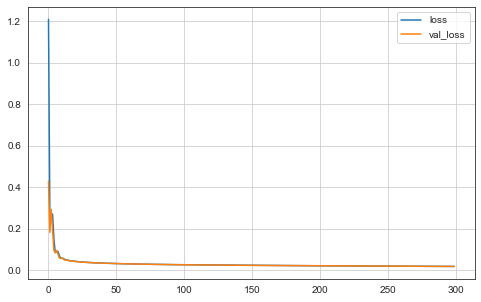

In [56]:
pd.DataFrame(history_mlp_weight_reg_train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [57]:
hist_weight_decay = pd.DataFrame(history_mlp_weight_reg_train.history) 
# hist_weight_decay.to_pickle("../data/mlp_transformed/hist_weight_decay.pkl")


In [58]:
y_pred_train = mlp_weight_reg_train.predict(train_x)
y_train_unsc = scaler_y_train.inverse_transform(train_y)
y_pred_train_unsc = scaler_y_train.inverse_transform(y_pred_train)
np.sqrt(mean_squared_error(y_train_unsc, y_pred_train_unsc))                       

0.10204858555014491

In [59]:
y_pred_val = mlp_weight_reg_train.predict(valid_x)
y_val_unsc = scaler_y_train.inverse_transform(valid_y)
y_pred_val_unsc = scaler_y_train.inverse_transform(y_pred_val)
np.sqrt(mean_squared_error(y_val_unsc, y_pred_val_unsc))                       

0.10204840908825333

### Testing
#### Either: rebuild Keras Tuner model

In [60]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# mlp_weight_reg_test = tuner.hypermodel.build(best_hps)

# # Retrain the model
# history_mlp_weight_reg_test = mlp_weight_reg_test.fit(all_train_x, all_train_y,
#                     epochs=81,
#                     batch_size=32,
#                    )

#### Or: rebuild best model manually

In [61]:
mlp_weight_reg_test = build_model_weight_reg_tuned()

history_mlp_weight_reg_test = mlp_weight_reg_test.fit(all_train_x, all_train_y,
                    epochs=81,
                    batch_size=32,
                    )

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/81
5/5 [==============================] - 0s 1ms/step - loss: 0.5231
Epoch 2/81
5/5 [==============================] - 0s 997us/step - loss: 0.2105
Epoch 3/81
5/5 [==============================] - 0s 997us/step - loss: 0.1519
Epoch 4/81
5/5 [==============================] - 0s 1ms/step - loss: 0.0865
Epoch 5/81
5/5 [==============================] - 0s 1ms/step - loss: 0.0895
Epoch 6/81
5/5 [==============================] - 0s 997us/step - loss: 0.0618
Epoch 7/81
5/5 [==============================] - 0s 998us/step - loss: 0.0627
Epoch 8/81
5/5 [==============================] - 0s 1ms/step - loss: 0.0555
Epoch 9/81
5/5 [==============================] - 0s 997us/step - loss: 0.0519
Epoch 10/81
5/5 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 11/81
5/5 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 12/81
5/5 [==============================] - 0s 1ms/step - loss: 0.0457
Epoch 13/81
5/5 [==============================] - 0s 1ms/step 

In [62]:
y_pred_all_train = mlp_weight_reg_test.predict(all_train_x)
y_all_train_unsc = scaler_y.inverse_transform(all_train_y)
y_pred_all_train_unsc = scaler_y.inverse_transform(y_pred_all_train)
np.sqrt(mean_squared_error(y_all_train_unsc, y_pred_all_train_unsc))         

0.9603052639067403

In [63]:
y_pred_test = mlp_weight_reg_test.predict(test_x)
y_test_unsc = scaler_y.inverse_transform(test_y)
y_pred_test_unsc = scaler_y.inverse_transform(y_pred_test)
np.sqrt(mean_squared_error(y_test_unsc, y_pred_test_unsc))         

0.9603048226559964

In [64]:
#mlp_weight_reg_test.save("../data/mlp_transformed/mlp_weight_reg_test")

### Test 10 times

In [65]:
mlp_weight_reg = build_model_weight_reg_tuned()
epochs = 81
batch_size = 32
train_score, test_score = test_10_times(simple_mlp, epochs, batch_size)

Epoch 1/81
5/5 [==============================] - 0s 998us/step - loss: 3.7418e-08
Epoch 2/81
5/5 [==============================] - 0s 748us/step - loss: 2.4680e-08
Epoch 3/81
5/5 [==============================] - 0s 1ms/step - loss: 2.0657e-08
Epoch 4/81
5/5 [==============================] - 0s 1ms/step - loss: 9.5779e-09
Epoch 5/81
5/5 [==============================] - 0s 997us/step - loss: 1.8759e-08
Epoch 6/81
5/5 [==============================] - 0s 999us/step - loss: 1.8934e-08
Epoch 7/81
5/5 [==============================] - 0s 1ms/step - loss: 1.3341e-08
Epoch 8/81
5/5 [==============================] - 0s 1ms/step - loss: 8.6299e-09
Epoch 9/81
5/5 [==============================] - 0s 748us/step - loss: 1.1596e-08
Epoch 10/81
5/5 [==============================] - 0s 997us/step - loss: 1.7013e-08
Epoch 11/81
5/5 [==============================] - 0s 996us/step - loss: 1.3770e-08
Epoch 12/81
5/5 [==============================] - 0s 748us/step - loss: 2.1010e-08
Epoch 13/

C:\Users\Enrico\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 16/81
5/5 [==============================] - 0s 1ms/step - loss: 3.5562e-08
Epoch 17/81
5/5 [==============================] - 0s 997us/step - loss: 3.8600e-08
Epoch 18/81
5/5 [==============================] - 0s 997us/step - loss: 3.9248e-08
Epoch 19/81
5/5 [==============================] - 0s 748us/step - loss: 3.5943e-08
Epoch 20/81
5/5 [==============================] - 0s 998us/step - loss: 2.2669e-08
Epoch 21/81
5/5 [==============================] - 0s 997us/step - loss: 1.4447e-08
Epoch 22/81
5/5 [==============================] - 0s 1ms/step - loss: 1.6422e-08
Epoch 23/81
5/5 [==============================] - 0s 748us/step - loss: 1.3205e-08
Epoch 24/81
5/5 [==============================] - 0s 997us/step - loss: 1.1786e-08
Epoch 25/81
5/5 [==============================] - 0s 997us/step - loss: 1.2059e-08
Epoch 26/81
5/5 [==============================] - 0s 997us/step - loss: 6.5638e-09
Epoch 27/81
5/5 [==============================] - 0s 997us/step - loss: 4.4246e

Epoch 33/81
5/5 [==============================] - 0s 748us/step - loss: 2.2867e-05
Epoch 34/81
5/5 [==============================] - 0s 927us/step - loss: 1.2522e-05
Epoch 35/81
5/5 [==============================] - 0s 991us/step - loss: 9.9128e-06
Epoch 36/81
5/5 [==============================] - 0s 742us/step - loss: 9.8719e-06
Epoch 37/81
5/5 [==============================] - 0s 748us/step - loss: 8.8126e-06
Epoch 38/81
5/5 [==============================] - 0s 742us/step - loss: 5.6604e-06
Epoch 39/81
5/5 [==============================] - 0s 754us/step - loss: 6.6272e-06
Epoch 40/81
5/5 [==============================] - 0s 748us/step - loss: 5.3004e-06
Epoch 41/81
5/5 [==============================] - 0s 741us/step - loss: 2.7897e-06
Epoch 42/81
5/5 [==============================] - 0s 989us/step - loss: 2.7175e-06
Epoch 43/81
5/5 [==============================] - 0s 991us/step - loss: 2.7393e-06
Epoch 44/81
5/5 [==============================] - 0s 752us/step - loss: 1.4

5/5 [==============================] - 0s 990us/step - loss: 1.1032e-10
Epoch 50/81
5/5 [==============================] - 0s 1ms/step - loss: 7.8467e-11
Epoch 51/81
5/5 [==============================] - 0s 998us/step - loss: 3.7805e-11
Epoch 52/81
5/5 [==============================] - 0s 998us/step - loss: 3.3920e-11
Epoch 53/81
5/5 [==============================] - 0s 998us/step - loss: 6.6503e-11
Epoch 54/81
5/5 [==============================] - 0s 989us/step - loss: 6.0408e-11
Epoch 55/81
5/5 [==============================] - 0s 989us/step - loss: 8.4624e-11
Epoch 56/81
5/5 [==============================] - 0s 743us/step - loss: 1.0106e-10
Epoch 57/81
5/5 [==============================] - 0s 748us/step - loss: 1.1250e-10
Epoch 58/81
5/5 [==============================] - 0s 998us/step - loss: 1.3038e-10
Epoch 59/81
5/5 [==============================] - 0s 758us/step - loss: 1.4346e-10
Epoch 60/81
5/5 [==============================] - 0s 748us/step - loss: 1.8243e-10
Epoch 

5/5 [==============================] - 0s 997us/step - loss: 8.5247e-11
Epoch 67/81
5/5 [==============================] - 0s 989us/step - loss: 7.2954e-11
Epoch 68/81
5/5 [==============================] - 0s 1ms/step - loss: 4.0310e-11
Epoch 69/81
5/5 [==============================] - 0s 998us/step - loss: 3.6700e-11
Epoch 70/81
5/5 [==============================] - 0s 998us/step - loss: 2.0743e-11
Epoch 71/81
5/5 [==============================] - 0s 1ms/step - loss: 6.4409e-11
Epoch 72/81
5/5 [==============================] - 0s 997us/step - loss: 1.3013e-10
Epoch 73/81
5/5 [==============================] - 0s 998us/step - loss: 3.4904e-10
Epoch 74/81
5/5 [==============================] - 0s 747us/step - loss: 5.5080e-10
Epoch 75/81
5/5 [==============================] - 0s 1ms/step - loss: 4.5155e-10
Epoch 76/81
5/5 [==============================] - 0s 998us/step - loss: 3.0932e-10
Epoch 77/81
5/5 [==============================] - 0s 991us/step - loss: 2.2441e-10
Epoch 78/8

5/5 [==============================] - 0s 997us/step - loss: 3.4220e-07
Epoch 3/81
5/5 [==============================] - 0s 748us/step - loss: 3.5165e-07
Epoch 4/81
5/5 [==============================] - 0s 997us/step - loss: 1.6485e-07
Epoch 5/81
5/5 [==============================] - 0s 997us/step - loss: 1.7453e-07
Epoch 6/81
5/5 [==============================] - 0s 997us/step - loss: 1.3272e-07
Epoch 7/81
5/5 [==============================] - 0s 998us/step - loss: 9.1752e-08
Epoch 8/81
5/5 [==============================] - 0s 748us/step - loss: 8.2557e-08
Epoch 9/81
5/5 [==============================] - 0s 748us/step - loss: 6.6759e-08
Epoch 10/81
5/5 [==============================] - 0s 748us/step - loss: 5.7476e-08
Epoch 11/81
5/5 [==============================] - 0s 748us/step - loss: 3.9636e-08
Epoch 12/81
5/5 [==============================] - 0s 748us/step - loss: 2.0459e-08
Epoch 13/81
5/5 [==============================] - 0s 748us/step - loss: 1.8689e-08
Epoch 14/81

5/5 [==============================] - 0s 748us/step - loss: 4.3512e-10
Epoch 20/81
5/5 [==============================] - 0s 757us/step - loss: 5.3702e-10
Epoch 21/81
5/5 [==============================] - 0s 756us/step - loss: 3.3923e-10
Epoch 22/81
5/5 [==============================] - 0s 748us/step - loss: 5.4628e-10
Epoch 23/81
5/5 [==============================] - 0s 748us/step - loss: 7.9318e-10
Epoch 24/81
5/5 [==============================] - 0s 748us/step - loss: 9.0485e-10
Epoch 25/81
5/5 [==============================] - 0s 755us/step - loss: 1.7637e-09
Epoch 26/81
5/5 [==============================] - 0s 748us/step - loss: 1.1895e-09
Epoch 27/81
5/5 [==============================] - 0s 748us/step - loss: 7.3054e-10
Epoch 28/81
5/5 [==============================] - 0s 748us/step - loss: 6.3335e-10
Epoch 29/81
5/5 [==============================] - 0s 748us/step - loss: 5.8308e-10
Epoch 30/81
5/5 [==============================] - 0s 748us/step - loss: 8.4182e-10
Epoc

5/5 [==============================] - 0s 997us/step - loss: 1.5168e-07
Epoch 37/81
5/5 [==============================] - 0s 748us/step - loss: 1.0101e-07
Epoch 38/81
5/5 [==============================] - 0s 997us/step - loss: 8.2258e-08
Epoch 39/81
5/5 [==============================] - 0s 755us/step - loss: 7.4987e-08
Epoch 40/81
5/5 [==============================] - 0s 748us/step - loss: 5.9362e-08
Epoch 41/81
5/5 [==============================] - 0s 748us/step - loss: 5.8426e-08
Epoch 42/81
5/5 [==============================] - 0s 997us/step - loss: 5.2107e-08
Epoch 43/81
5/5 [==============================] - 0s 988us/step - loss: 2.7839e-08
Epoch 44/81
5/5 [==============================] - 0s 757us/step - loss: 2.3199e-08
Epoch 45/81
5/5 [==============================] - 0s 881us/step - loss: 2.3013e-08
Epoch 46/81
5/5 [==============================] - 0s 997us/step - loss: 2.5696e-08
Epoch 47/81
5/5 [==============================] - 0s 998us/step - loss: 2.9651e-08
Epoc

Epoch 53/81
5/5 [==============================] - 0s 989us/step - loss: 3.9216e-11
Epoch 54/81
5/5 [==============================] - 0s 998us/step - loss: 3.8131e-11
Epoch 55/81
5/5 [==============================] - 0s 988us/step - loss: 4.8690e-11
Epoch 56/81
5/5 [==============================] - 0s 748us/step - loss: 1.5222e-10
Epoch 57/81
5/5 [==============================] - 0s 748us/step - loss: 1.5261e-10
Epoch 58/81
5/5 [==============================] - 0s 990us/step - loss: 1.9093e-10
Epoch 59/81
5/5 [==============================] - 0s 919us/step - loss: 1.9270e-10
Epoch 60/81
5/5 [==============================] - 0s 997us/step - loss: 1.6884e-10
Epoch 61/81
5/5 [==============================] - 0s 757us/step - loss: 1.8743e-10
Epoch 62/81
5/5 [==============================] - 0s 997us/step - loss: 1.8113e-10
Epoch 63/81
5/5 [==============================] - 0s 747us/step - loss: 1.4350e-10
Epoch 64/81
5/5 [==============================] - 0s 997us/step - loss: 1.1

5/5 [==============================] - 0s 998us/step - loss: 6.2165e-12
Epoch 70/81
5/5 [==============================] - 0s 1ms/step - loss: 6.3866e-12
Epoch 71/81
5/5 [==============================] - 0s 748us/step - loss: 3.2997e-12
Epoch 72/81
5/5 [==============================] - 0s 748us/step - loss: 5.6441e-12
Epoch 73/81
5/5 [==============================] - 0s 892us/step - loss: 5.2221e-12
Epoch 74/81
5/5 [==============================] - 0s 1ms/step - loss: 7.2429e-12
Epoch 75/81
5/5 [==============================] - 0s 748us/step - loss: 1.3611e-11
Epoch 76/81
5/5 [==============================] - 0s 997us/step - loss: 1.4498e-11
Epoch 77/81
5/5 [==============================] - 0s 993us/step - loss: 3.4403e-11
Epoch 78/81
5/5 [==============================] - 0s 748us/step - loss: 6.2620e-11
Epoch 79/81
5/5 [==============================] - 0s 1ms/step - loss: 5.1626e-11
Epoch 80/81
5/5 [==============================] - 0s 1ms/step - loss: 6.8682e-11
Epoch 81/81


In [66]:
pd.DataFrame(train_score).describe()

,0
count,10.000000
mean,0.030197
std,0.054903
min,0.000215
25%,0.000811
50%,0.001768
75%,0.034779
max,0.166858


In [67]:
pd.DataFrame(test_score).describe()

,0
count,10.000000
mean,0.030197
std,0.054903
min,0.000215
25%,0.000811
50%,0.001768
75%,0.034779
max,0.166858


### Plotting the Simple MLPs

In [68]:
sns.set_style("white")

#### If not all models were run: Read saved files

In [73]:
# hist_simple_mlp = pd.read_pickle("../data/mlp_transformed/hist_simple_mlp.pkl")
# hist_simple_dropout = pd.read_pickle("../data/mlp_transformed/hist_simple_dropout.pkl")
# hist_simple_weight_reg = pd.read_pickle("../data/mlp_transformed/hist_simple_weight_reg.pkl")

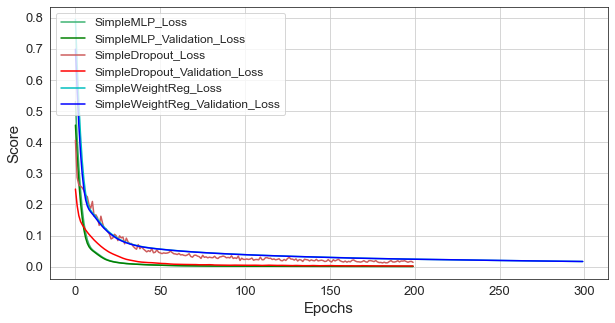

In [74]:
fig_simple_mlps, ax = plt.subplots(figsize=(10, 5))
ax.plot(hist_simple_mlp['loss'], label='SimpleMLP_Loss', color='mediumseagreen' )
ax.plot(hist_simple_mlp['val_loss'], label='SimpleMLP_Validation_Loss', color='green' )
ax.plot(hist_simple_dropout['loss'], label='SimpleDropout_Loss', color='indianred')
ax.plot(hist_simple_dropout['val_loss'], label='SimpleDropout_Validation_Loss', color='red')
ax.plot(hist_simple_weight_reg['loss'], label='SimpleWeightReg_Loss', color='c')
ax.plot(hist_simple_weight_reg['val_loss'], label='SimpleWeightReg_Validation_Loss', color='blue')
ax.set(xlabel=' Epochs', ylabel='Score')
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Score', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax.legend(loc='upper left',prop={'size': 12} )
ax.grid()

### Plotting tuned models

#### If not all models were run: Read saved files

In [75]:
# hist_weight_decay = pd.read_pickle("../data/mlp_transformed/hist_weight_decay.pkl")
# hist_mlp_dropout = pd.read_pickle("../data/mlp_transformed/hist_mlp_dropout.pkl")

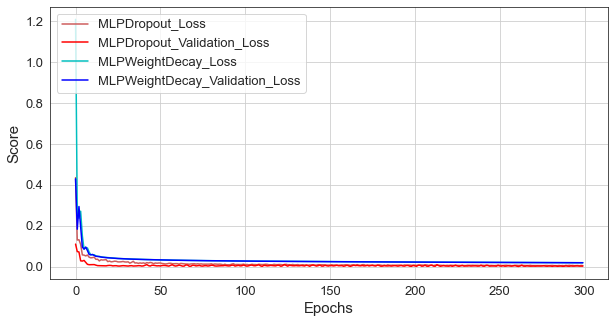

In [76]:
fig_final_mlps, ax = plt.subplots(figsize=(10, 5))
ax.plot(hist_mlp_dropout['loss'][:300], label='MLPDropout_Loss', color='indianred' )
ax.plot(hist_mlp_dropout['val_loss'][:300], label='MLPDropout_Validation_Loss', color='red' )
ax.plot(hist_weight_decay['loss'][:300], label='MLPWeightDecay_Loss', color='c')
ax.plot(hist_weight_decay['val_loss'][:300], label='MLPWeightDecay_Validation_Loss', color='blue')
ax.set(xlabel=' Epochs', ylabel='Score')
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Score', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax.legend(loc='upper left',prop={'size': 13} )
ax.grid()

### Graphical Evaluation

#### Load best model if needed

In [89]:
# mlp_weight_reg_test = keras.models.load_model("../data/mlp_transformed/mlp_weight_reg_test")
# mlp_weight_reg_train = keras.models.load_model("../data/mlp_transformed/mlp_weight_reg_train")

In [90]:
y_pred_train = mlp_weight_reg_test.predict(all_train_x)
y_train_unsc = scaler_y.inverse_transform(all_train_y)
y_pred_train_unsc = scaler_y.inverse_transform(y_pred_train)
np.sqrt(mean_squared_error(y_train_unsc, y_pred_train_unsc))                       

0.41547614227722107

In [91]:
y_pred_valid = mlp_weight_reg_train.predict(valid_x)
y_valid_unsc = scaler_y_train.inverse_transform(valid_y)
y_pred_valid_unsc = scaler_y_train.inverse_transform(y_pred_valid)
np.sqrt(mean_squared_error(y_valid_unsc, y_pred_valid_unsc))                       

0.10204840908825333

In [92]:
y_pred_test_final = mlp_weight_reg_test.predict(test_x)
y_test_unsc = scaler_y.inverse_transform(test_y)
y_pred_test_unsc_final = scaler_y.inverse_transform(y_pred_test_final)
np.sqrt(mean_squared_error(y_test_unsc, y_pred_test_unsc_final))   

0.4154762815958931

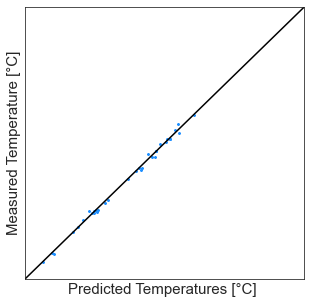

In [93]:
fig, ax1 = plt.subplots(1, figsize=(5, 5),  sharex=True, sharey=True)
plt.xlim(750, 800)
plt.ylim(750, 800)

ax1.scatter( y_pred_train_unsc, y_train_unsc, c= 'dodgerblue',s=1)
ax1.plot([750,800],[750,800], c='black')
ax1.grid()
ax1.set_xlabel('Predicted Temperatures [°C] ', fontsize=15)
ax1.set_ylabel('Measured Temperature [°C]',fontsize=15)
ax1.set(yticks=[]) 
ax1.set(xticks=[]) 
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

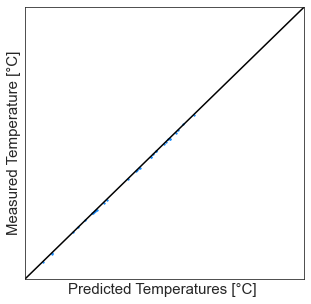

In [94]:
fig, ax1 = plt.subplots(1, figsize=(5, 5),  sharex=True, sharey=True)
plt.xlim(750, 800)
plt.ylim(750, 800)

ax1.scatter( y_pred_valid_unsc, y_valid_unsc, c= 'dodgerblue',s=1)
ax1.plot([750,800],[750,800], c='black')
ax1.grid()
ax1.set_xlabel('Predicted Temperatures [°C] ', fontsize=15)
ax1.set_ylabel('Measured Temperature [°C]',fontsize=15)
ax1.set(yticks=[]) 
ax1.set(xticks=[]) 
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

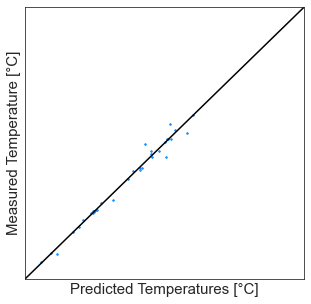

In [95]:
fig, ax1 = plt.subplots(1,  figsize=(5, 5),  sharex=True, sharey=True)
plt.xlim(750, 800)
plt.ylim(750, 800)

ax1.scatter( y_pred_test_unsc, y_test_unsc,  c= 'dodgerblue',s=1)
ax1.plot([750,800],[750,800], c='black')
ax1.grid()
ax1.set_xlabel('Predicted Temperatures [°C]', fontsize=15)
ax1.set_ylabel('Measured Temperature [°C]',fontsize=15)
ax1.set(yticks=[]) 
ax1.set(xticks=[]) 
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

### looking at single sequences

In [96]:
## Get predicted and real value for each sequence seperately
seq_ids = test_data.groupby('seq_id')
seq_id_test_data = list(seq_ids.groups.keys())

df_temp_predicted = pd.DataFrame(y_pred_test_unsc_final, columns=['TempMittelLsInC_predicted','TempMittelFsInC_predicted'])
df_pred = pd.concat([df_temp_predicted, test_data['seq_id']], axis=1)

prediction = {}
real_values = {}
rmse = {}
for seq in seq_id_test_data:
    prediction[seq] = df_pred[['TempMittelLsInC_predicted', 'TempMittelFsInC_predicted']][df_pred['seq_id']==seq].to_numpy()
    real_values[seq] = test_data[['TempMittelLsInC_mean', 'TempMittelFsInC_mean']][test_data['seq_id']
                                                                                   ==seq].to_numpy()
    rmse[seq] = np.sqrt(mean_squared_error( prediction[seq],  real_values[seq]))  

error = []
for seq in seq_id_test_data:
    error.append((rmse[seq], seq))

In [97]:
sorted(error)

[(0.39512722576708925, '471719_str_2'),
 (0.39512722576708925, '471724_str_2'),
 (0.39512722576708925, '471728_str_2'),
 (0.43487418478808737, '471719_str_1'),
 (0.43487418478808737, '471724_str_1'),
 (0.43487418478808737, '471728_str_1')]

RMSE: 0.39512722576708925


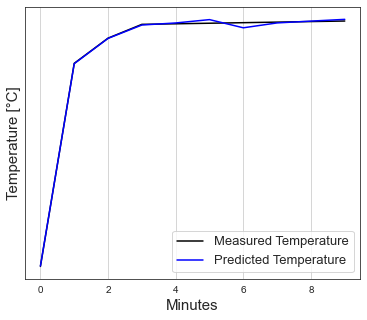

In [98]:
seq_number = '471719_str_2'

fig, (ax1) = plt.subplots(1, figsize=(6, 5),  sharex=True, sharey=True)
ax1.plot(real_values[seq_number][:,:1], color='black', label='Measured Temperature')
ax1.plot(prediction[seq_number][:,:1], color='blue', label='Predicted Temperature')
ax1.legend(loc='best')
ax1.grid()
ax1.set_xlabel('Minutes', fontsize=15)
ax1.set_ylabel('Temperature [°C]',fontsize=15)
ax1.set(yticks=[]) 
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
ax1.legend(prop={'size': 13})
print('RMSE:', rmse[seq_number] )

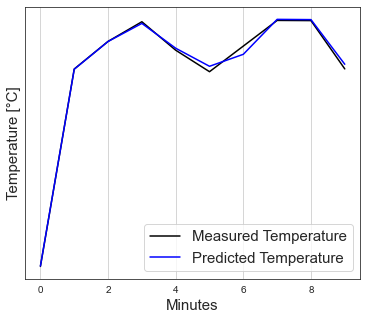

In [99]:
seq_number = '471719_str_2'
fig2, (ax2) = plt.subplots(1, figsize=(6, 5),  sharex=True, sharey=True)

ax2.plot(real_values[seq_number][:,1:2], color='black', label='Measured Temperature')
ax2.plot(prediction[seq_number][:,1:2], color='blue', label='Predicted Temperature')
ax2.legend(loc='best')
ax2.grid()
ax2.set_xlabel('Minutes', fontsize=15)
ax2.set_ylabel('Temperature [°C]',fontsize=15)
ax2.set(yticks=[]) 
ax2.xaxis.grid(True)
ax2.legend(prop={'size': 15})

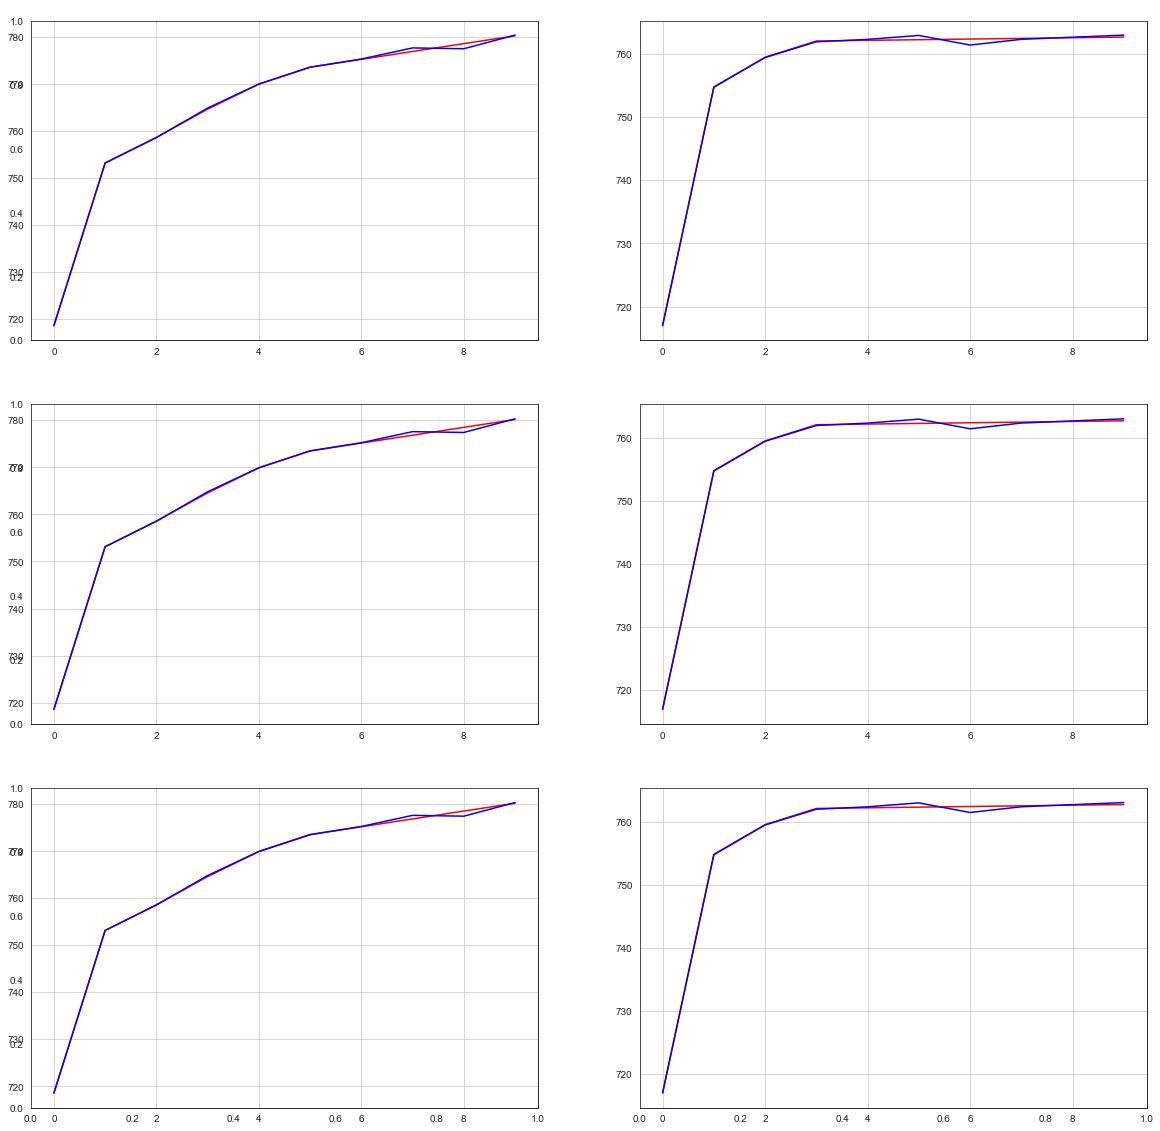

In [100]:
sequences = seq_id_test_data
sequences.sort()
fig_test_data, axes = plt.subplots(3, 2, figsize=(20, 20),sharey=True, sharex=True)
fig.suptitle('Prediciton vs real Temperature for LS', color='white')

ax = {}
i = 1
for seq in sequences[0:6]:
    ax[seq] = fig_test_data.add_subplot(3,2,i)
    ax[seq].plot(real_values[seq][:,:1], color='red')
    ax[seq].plot(prediction[seq][:,:1], color='blue')
    ax[seq].set_title(seq, color='white')
    ax[seq].grid()
    
    i += 1